<a href="https://colab.research.google.com/github/RufinoMartin/DataScience2021/blob/main/Notebook_Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Presentacion

##  1.1 Integrantes:

**Pedro Vernengo:**

**Rufino Martín:** Psicologo e Investigador en Geopolitica e Inteligencia.

## 1.2 Tema de Investigacion y Desarrollo:

Politicas Gubernamentales y sus efectos economicos: estudio de la economia mundial durante el Covid-19. 

## 1.3 Objetivos : 

- Analizar la variación del precio de commodities y los índices bursátiles en relación a las medidas gubernamentales por COVID19, dentro del marco temporal 2019-2022.
- Exploracion de relaciones, generacion y prueba de hipotesis.
- Seleccion de algoritmos de Machine Learning para procesamiento de los datos.

## 1.4 Repositorio: 

https://github.com/RufinoMartin/DataScience2021




# 2. Los Datos y sus variables

## 2.1 Primer Grupo de Variables : “Medidas Gubernamentales frente al COVID”
Definición: Medidas ejecutivas sanitarias, economicas y sociales en 168 paises a raiz de la situacion Covid19.

Operacionalización: Conjuntos de Variables definidas y operacionalizadas por la Universidad de Oxford, obtenidas de los ministerios de salud de todos los gobiernos.

Notebook: Restricciones_Covid_Final.ipynb.

Fuente: Universidad de Oxford.

## 2.2 Segundo Grupo de Variables : “Precio de Indices de Commodities”
Definición: Precio agrupado de Indices de Commodities (Metales, Industria, Agro, Alimentos, Energia).

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Commodities_Final.ipynb

Fuente: Fondo Monetario Internacional.

## 2.3 Tercer Grupo de Variables : “Precio de Índices Bursátiles”
Definición: Precios de los mayores Índices Bursatiles Mundiales

Operacionalización: Conteo y promediado de precios históricos.

Notebook: Indices_Bursatiles_Finales.ipynb.

Fuente: Sitio Web MarketWatch.

In [3]:
#Importacion de Librerias

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import pandas_profiling
from pandas_profiling import ProfileReport
from functools import reduce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Por la gran cantidad y tamaño de los datasets, se ha realizado una digestion previa de los mismos. Para acceder a los notebooks preliminares donde se realizó dicha labor, consultar los notebooks del repositorio.
 
El resultado del procesamiento preliminar la misma ha sido un archivo .CSV, que procedemos a importar, y que de no ejecutarse correctamente el pd.read, se encuentra disponible aqui:
 
https://github.com/RufinoMartin/DataScience2021/blob/main/DatasetFinal.csv
 
Copiar el URL del Raw, y pegar:
 

In [4]:
df_Integrado = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/DataScience2021/main/DatasetFinal.csv?token=GHSAT0AAAAAABRYGSF2AU7WYLMS3MGIPAUWYR3RMBA')

# Data Wrangling

Procedemos a corregir los tipos de datos de CountryName y DateTime.

In [5]:
# Observamos que tipos de datos tenemos en el dataframe.

df_Integrado.dtypes

Unnamed: 0                          int64
Pais                               object
Fecha                              object
Ind. Rigor C19                    float64
Ind. Sanitario C19                float64
Ind. Apoyo Economico C19          float64
Promedio Respuesta Estatal C19    float64
Alimentos                         float64
Industrial                        float64
Agro                              float64
Metales                           float64
Energia                           float64
Promedio Commodities              float64
Dolar Americano                   float64
$S&P500                           float64
$SHA                              float64
$UKX                              float64
$SX5P                             float64
Promedio Bursatil                 float64
dtype: object

In [6]:
# Removemos columna residual

df_Integrado.drop(columns={'Unnamed: 0'}, inplace=True)

In [7]:
# 'Fecha' a formato DateTime

df_Integrado['Fecha'] = pd.to_datetime(df_Integrado['Fecha'])

In [8]:
# 'Pais' a formato String

df_Integrado['Pais'] = df_Integrado['Pais'].astype(str)

In [9]:
# Corroboramos

df_Integrado.dtypes

Pais                                      object
Fecha                             datetime64[ns]
Ind. Rigor C19                           float64
Ind. Sanitario C19                       float64
Ind. Apoyo Economico C19                 float64
Promedio Respuesta Estatal C19           float64
Alimentos                                float64
Industrial                               float64
Agro                                     float64
Metales                                  float64
Energia                                  float64
Promedio Commodities                     float64
Dolar Americano                          float64
$S&P500                                  float64
$SHA                                     float64
$UKX                                     float64
$SX5P                                    float64
Promedio Bursatil                        float64
dtype: object

In [10]:
# Reordenamos Columnas

df_Integrado = df_Integrado[['Fecha', 'Pais', 'Ind. Rigor C19', 'Ind. Sanitario C19', 'Ind. Apoyo Economico C19','Promedio Respuesta Estatal C19',
                             'Alimentos','Industrial','Agro','Metales','Energia','Promedio Commodities',
                             'Dolar Americano','$S&P500','$SHA','$UKX','$SX5P','Promedio Bursatil']]

In [11]:
df_Integrado.head(5)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.466542,118.836909,103.536150,114.711385,133.302098,117.078244,95.58,2704.10,2584.57,6968.85,2897.13,3788.6625
1,2019-02-01,0,0.0,0.0,0.0,0.0,98.772205,125.808562,103.608780,120.811052,136.048817,119.011525,96.16,2709.80,2940.95,7074.73,3029.67,3938.7875
2,2019-03-01,0,0.0,0.0,0.0,0.0,98.063110,127.539176,105.409046,121.105733,138.256367,119.910036,97.28,2834.40,3090.76,7279.19,3117.01,4080.3400
3,2019-04-01,0,0.0,0.0,0.0,0.0,101.569201,129.656529,104.681017,121.924057,143.768294,123.416731,97.48,2945.83,3078.34,7418.22,3199.51,4160.4750
4,2019-05-01,0,0.0,0.0,0.0,0.0,98.094289,129.330578,105.436360,121.161561,139.410557,120.477541,97.61,2752.06,2898.70,7161.71,3042.89,3963.8400


In [12]:
#Redondeamos decimales

df_Integrado = round(df_Integrado, 2)

In [57]:
# Dropeamos todas las filas en las cuales la fecha va mas alla de enero del 2022, ya que hasta alli llega nuestra fuente de Commodities actualizada por el FMI. 

df_Integrado.drop(df_Integrado.loc[df_Integrado['Fecha'] > '2022-01-01 01:00:00'].index, inplace=True)


In [58]:
df_Integrado.shape

(7812, 18)

In [59]:
df_Integrado.head(1)

,Fecha,Pais,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
0,2019-01-01,0,0.0,0.0,0.0,0.0,100.47,118.84,103.54,114.71,133.3,117.08,95.58,2704.1,2584.57,6968.85,2897.13,3788.66


### **Indices utilizados**


- ***Gubernamentales C-19:***

"Indice Rigor C19" (Confinamientos, Restricciones, Prohibiciones)

"Indice Sanitario C19" (Modificaciones protocolares, Regimen de testeos, inversion en salud, pasaporte sanitario)

"Indice Apoyo Economico C19" (Subvenciones economicas, planes economicos ejecutivos)

***Superindice:*** "Promedio Respuesta Estatal C19" (Sintesis de todos los indicadores)


- ***Bursatiles:***

"Dolar Americano" ( DYX o The U.S. Dollar Index is used to measure the value of the dollar against a basket of six world currencies: Euro, Swiss Franc, Japanese Yen, Canadian dollar, British pound, and Swedish Krona)

"S&P500" ("Standard and Poor 500" is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States)

"SHA" (The Shanghai Stock Exchange is one of the three stock exchanges operating independently in mainland China. The Shanghai Stock Exchange is the world's 3rd largest stock market by market capitalization at US$7.62 trillion as of July 2021)

"UKX" (The "FTSE 100 Index" The Financial Times Stock Exchange 100 Index, is a share index of the 100 companies listed on the London Stock Exchange with the highest market capitalisation.

"SX5P" (The STOXX Europe 50 index provides a blue-chip representation of supersector leaders in Europe covering almost 50% of the free-float market capitalization of the European stock market.)

***Superindice:***: "Promedio Bursatil" (Promedia los 4 Indices superiores, a excepcion del dolar)

- ***Comoddities (FMI):***
 
 
 "Alimentos",	"Industrial",	"Agro",	"Metales" y "Energia".

 ***Superindice:***:  "Promedio Commodities" ( Promedia los 5 Indices superiores)


# EDA : EXPLORACION DE DATOS 

In [60]:
df_Integrado.shape

(7812, 18)

In [61]:
df_Integrado.isnull().values.any()

False

In [62]:
df_Integrado.describe

<bound method NDFrame.describe of           Fecha      Pais  Ind. Rigor C19  Ind. Sanitario C19  Ind. Apoyo Economico C19  Promedio Respuesta Estatal C19  Alimentos  Industrial    Agro  Metales  Energia  Promedio Commodities  Dolar Americano  $S&P500     $SHA     $UKX    $SX5P  Promedio Bursatil
0    2019-01-01         0            0.00                0.00                       0.0                            0.00     100.47      118.84  103.54   114.71   133.30                117.08            95.58  2704.10  2584.57  6968.85  2897.13            3788.66
1    2019-02-01         0            0.00                0.00                       0.0                            0.00      98.77      125.81  103.61   120.81   136.05                119.01            96.16  2709.80  2940.95  7074.73  3029.67            3938.79
2    2019-03-01         0            0.00                0.00                       0.0                            0.00      98.06      127.54  105.41   121.11   138.26         

In [63]:
df_Integrado.count()

Fecha                             7812
Pais                              7812
Ind. Rigor C19                    7812
Ind. Sanitario C19                7812
Ind. Apoyo Economico C19          7812
Promedio Respuesta Estatal C19    7812
Alimentos                         7812
Industrial                        7812
Agro                              7812
Metales                           7812
Energia                           7812
Promedio Commodities              7812
Dolar Americano                   7812
$S&P500                           7812
$SHA                              7812
$UKX                              7812
$SX5P                             7812
Promedio Bursatil                 7812
dtype: int64

In [64]:
df_Integrado.info

<bound method DataFrame.info of           Fecha      Pais  Ind. Rigor C19  Ind. Sanitario C19  Ind. Apoyo Economico C19  Promedio Respuesta Estatal C19  Alimentos  Industrial    Agro  Metales  Energia  Promedio Commodities  Dolar Americano  $S&P500     $SHA     $UKX    $SX5P  Promedio Bursatil
0    2019-01-01         0            0.00                0.00                       0.0                            0.00     100.47      118.84  103.54   114.71   133.30                117.08            95.58  2704.10  2584.57  6968.85  2897.13            3788.66
1    2019-02-01         0            0.00                0.00                       0.0                            0.00      98.77      125.81  103.61   120.81   136.05                119.01            96.16  2709.80  2940.95  7074.73  3029.67            3938.79
2    2019-03-01         0            0.00                0.00                       0.0                            0.00      98.06      127.54  105.41   121.11   138.26           

In [66]:
CorrelacionP = df_Integrado.corr(method="pearson")
CorrelacionP

,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
Ind. Rigor C19,1.000000,0.936312,0.464501,0.926592,-0.090910,0.025001,-0.112806,0.102006,-0.204999,-0.153127,-0.189712,-0.008440,0.079240,-0.305363,-0.208251,-0.138677
Ind. Sanitario C19,0.936312,1.000000,0.485740,0.988490,0.135320,0.241197,0.100331,0.314526,0.010058,0.073824,-0.310678,0.219534,0.284972,-0.144144,-0.012622,0.074592
Ind. Apoyo Economico C19,0.464501,0.485740,1.000000,0.609879,-0.071588,0.024762,-0.079511,0.091044,-0.142647,-0.105785,-0.195629,0.003441,0.096179,-0.222582,-0.153258,-0.091583
Promedio Respuesta Estatal C19,0.926592,0.988490,0.609879,1.000000,0.104569,0.218032,0.073326,0.295635,-0.021490,0.042497,-0.312833,0.192315,0.268517,-0.171762,-0.042810,0.046154
Alimentos,-0.090910,0.135320,-0.071588,0.104569,1.000000,0.919030,0.922989,0.862100,0.899978,0.953727,-0.396772,0.946241,0.778810,0.813178,0.902462,0.941494
Industrial,0.025001,0.241197,0.024762,0.218032,0.919030,1.000000,0.913126,0.983133,0.725112,0.824731,-0.655258,0.876470,0.833134,0.659352,0.751620,0.840568
Agro,-0.112806,0.100331,-0.079511,0.073326,0.922989,0.913126,1.000000,0.867335,0.787299,0.857831,-0.540963,0.855477,0.807218,0.722265,0.775602,0.855411
Metales,0.102006,0.314526,0.091044,0.295635,0.862100,0.983133,0.867335,1.000000,0.658829,0.768378,-0.740376,0.851855,0.864520,0.551823,0.666395,0.781912
Energia,-0.204999,0.010058,-0.142647,-0.021490,0.899978,0.725112,0.787299,0.658829,1.000000,0.986789,-0.177270,0.914971,0.699628,0.834571,0.928093,0.929611
Promedio Commodities,-0.153127,0.073824,-0.105785,0.042497,0.953727,0.824731,0.857831,0.768378,0.986789,1.000000,-0.294651,0.956323,0.768754,0.830156,0.932363,0.955467


## Analisis Multivariado Exploratorio para los Indices Gubernamentales C-19

In [67]:
# Correr si hay errores en visualizaciones.

%matplotlib inline
plt.close('all')

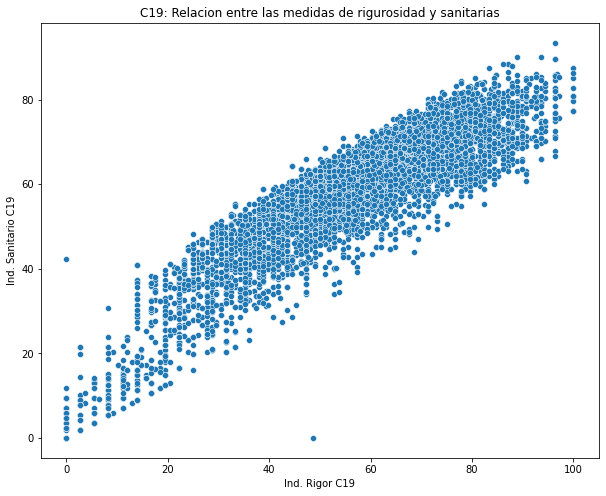

In [98]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Ind. Sanitario C19',data=df_Integrado)
plt.title('C19: Relacion entre las medidas de rigurosidad y sanitarias')
plt.show()

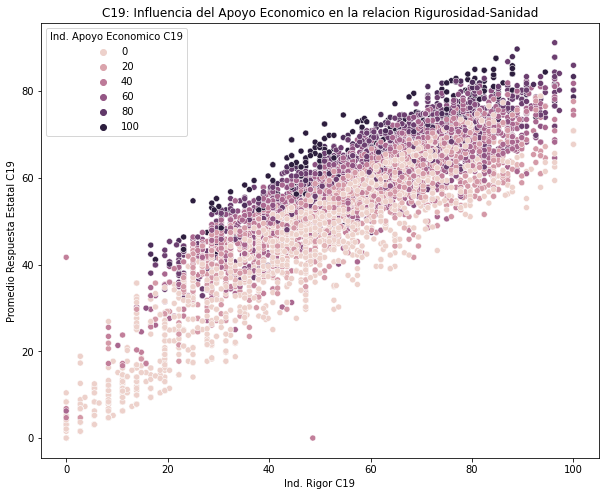

In [97]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Ind. Rigor C19',y='Promedio Respuesta Estatal C19',data=df_Integrado,hue='Ind. Apoyo Economico C19')
plt.title('C19: Influencia del Apoyo Economico en la relacion Rigurosidad-Sanidad')
plt.show()

#La relacion entre los Indices es fuerte. 
# Esto tiene sentido   1) porque comparten los indicadores de los cuales se conforman 
#                      2) porque los indices reflejan politicas ejecutivas, que generalmente aumentaron o dismninuyeron de forma conjunta. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


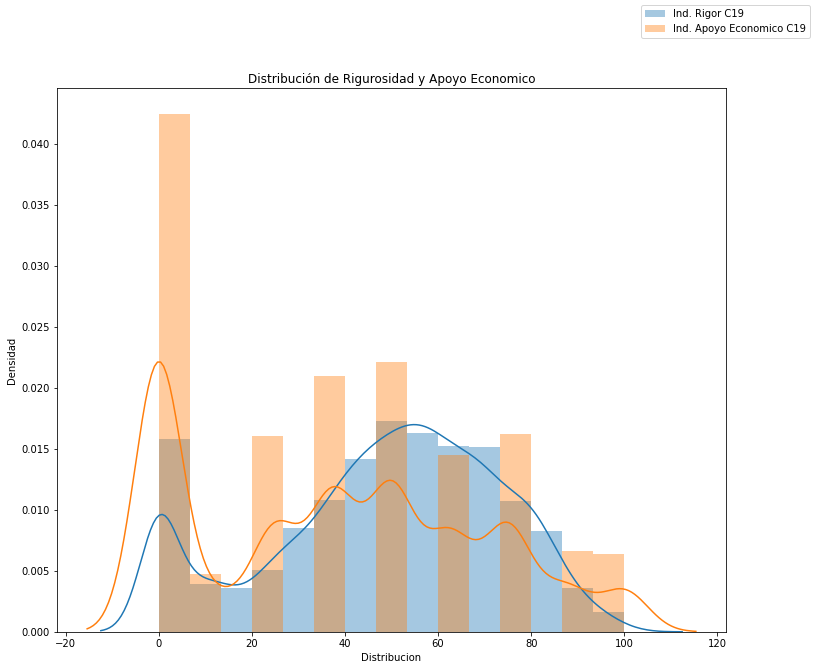

In [102]:
#Grafico compartido para las distribuciones del Indice de Rigor y de Apoyo Economico. 

fig = plt.figure(figsize=(12,10))

sns.distplot(df_Integrado['Ind. Rigor C19'], kde=True, hist=True, bins=15, label='Ind. Rigor C19')
sns.distplot(df_Integrado['Ind. Apoyo Economico C19'], kde=True, hist=True, bins=15, label='Ind. Apoyo Economico C19')

fig.legend()
plt.xlabel('Distribucion')
plt.ylabel('Densidad')
plt.title('Distribución de Rigurosidad y Apoyo Economico')

plt.show()

# Analisis Multivariado para los Indices de Commodities 
 

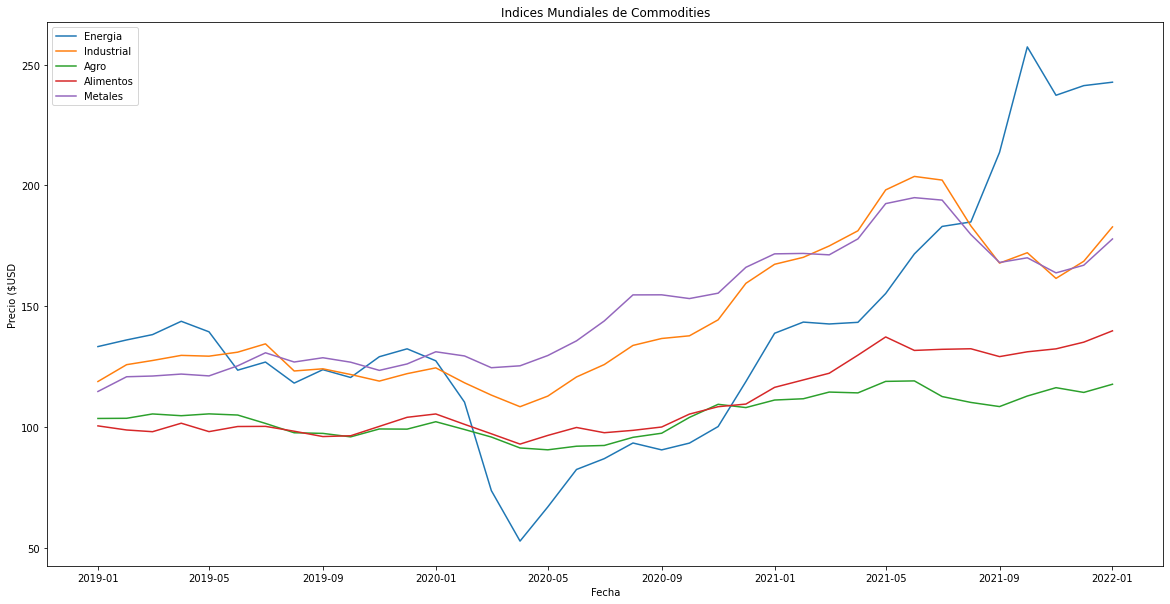

In [134]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['Energia'], label='Energia')
ax.plot(df_Integrado.Fecha, df_Integrado['Industrial'], label='Industrial')
ax.plot(df_Integrado.Fecha, df_Integrado['Agro'], label='Agro')
ax.plot(df_Integrado.Fecha, df_Integrado['Alimentos'],label='Alimentos')
ax.plot(df_Integrado.Fecha, df_Integrado['Metales'],label='Metales')

plt.xlabel('Fecha')
plt.ylabel('Precio ($USD')

plt.legend()
plt.title('Indices Mundiales de Commodities')
plt.show()

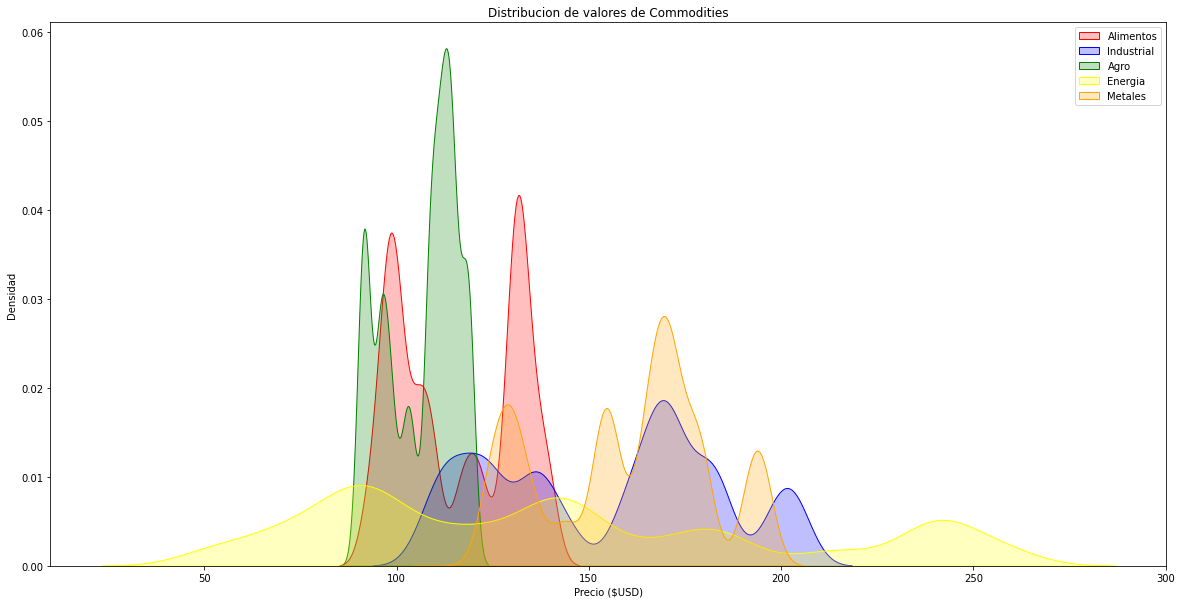

In [129]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado.Alimentos, label='Alimentos', shade=True, color='red', )
sns.kdeplot(df_Integrado.Industrial, label='Industrial', shade=True, color='blue')
sns.kdeplot(df_Integrado.Agro, label='Agro', shade=True, color='green')
sns.kdeplot(df_Integrado.Energia, label='Energia', shade=True, color='yellow')
sns.kdeplot(df_Integrado.Metales, label='Metales', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Commodities')
plt.xlabel('Precio ($USD)')
plt.ylabel('Densidad')
plt.show()

# Analisis Multivariado para los Indices Bursatiles.

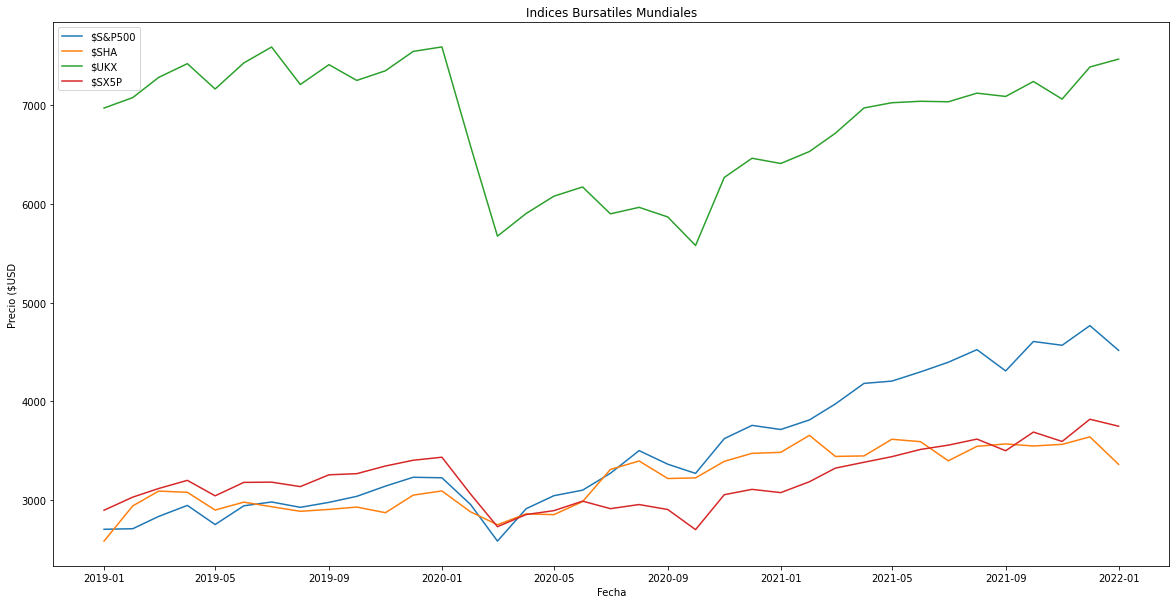

In [135]:
# Indices de Commodities

fig, ax = plt.subplots(figsize=(20,10))

ax.plot(df_Integrado.Fecha, df_Integrado['$S&P500'],label='$S&P500')
ax.plot(df_Integrado.Fecha, df_Integrado['$SHA'],label='$SHA')
ax.plot(df_Integrado.Fecha, df_Integrado['$UKX'],label='$UKX')
ax.plot(df_Integrado.Fecha, df_Integrado['$SX5P'],label='$SX5P')

plt.xlabel('Fecha')
plt.ylabel('Precio ($USD')
plt.legend()
plt.title('Indices Bursatiles Mundiales')
plt.show()

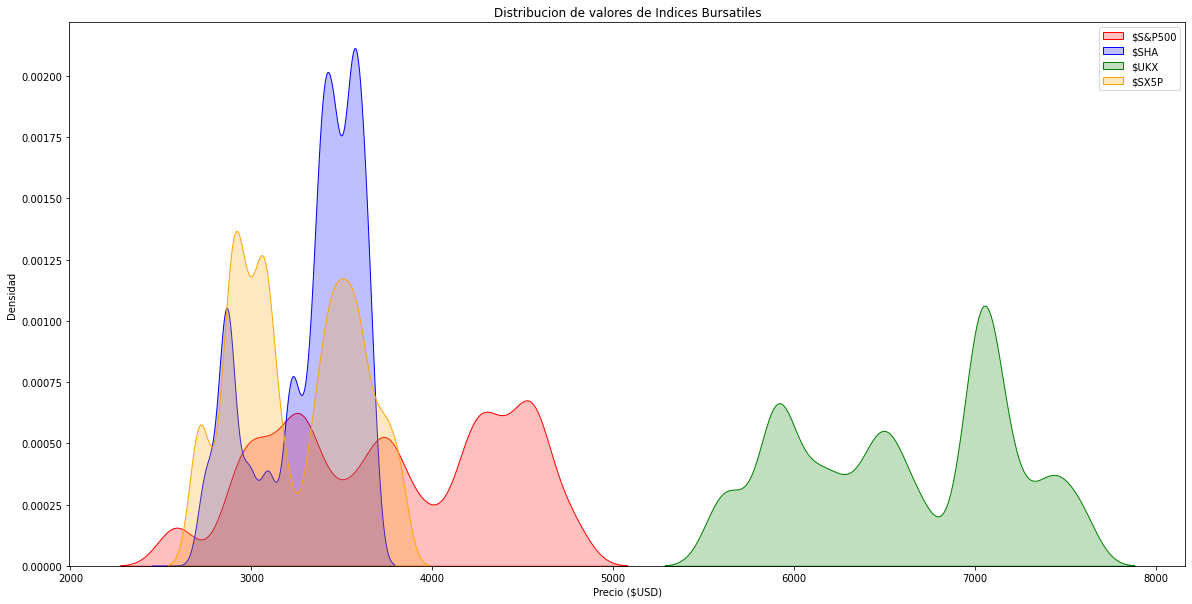

In [128]:
fig, ax = plt.subplots(figsize=(20,10))

sns.kdeplot(df_Integrado['$S&P500'], label='$S&P500', shade=True, color='red')
sns.kdeplot(df_Integrado['$SHA'], label='$SHA', shade=True, color='blue')
sns.kdeplot(df_Integrado['$UKX'], label='$UKX', shade=True, color='green')
sns.kdeplot(df_Integrado['$SX5P'], label='$SX5P', shade=True, color='orange')

plt.legend()
plt.title('Distribucion de valores de Indices Bursatiles')
plt.xlabel('Precio ($USD)')
plt.ylabel('Densidad')
plt.show()

# Analisis Atemporal Multivariado Para Todas Las Variables

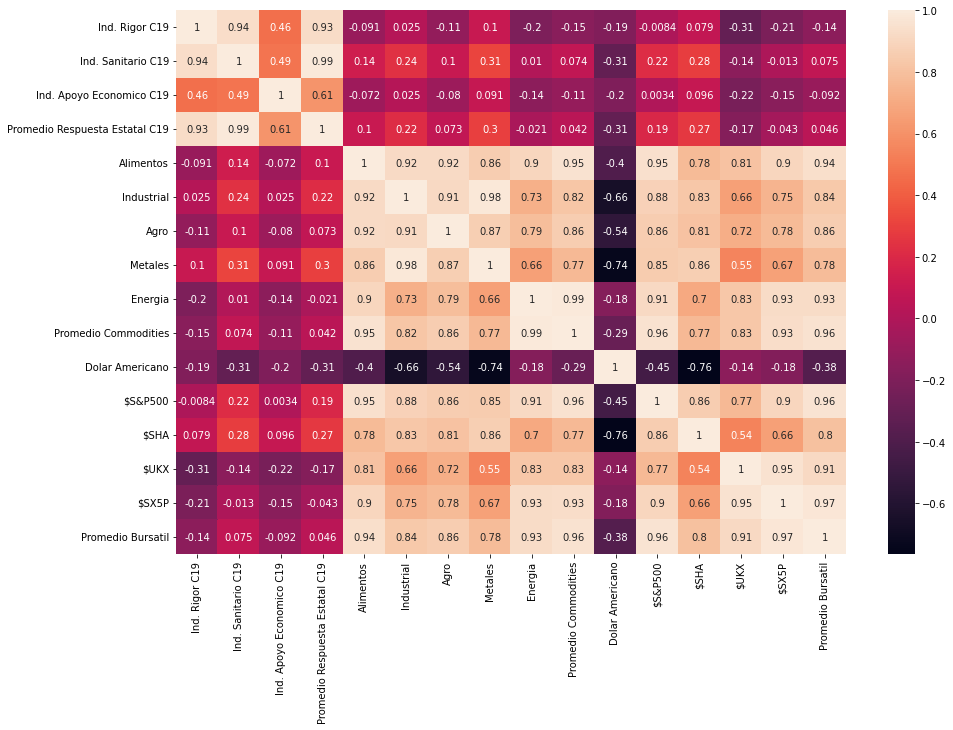

In [71]:
#Correlaciones de Heatmap 

plt.figure(figsize=(15, 10))

heatmap_test = df_Integrado.corr()
sns.heatmap(heatmap_test, 
            xticklabels = heatmap_test.columns.values,
            yticklabels = heatmap_test.columns.values,
            annot = True);

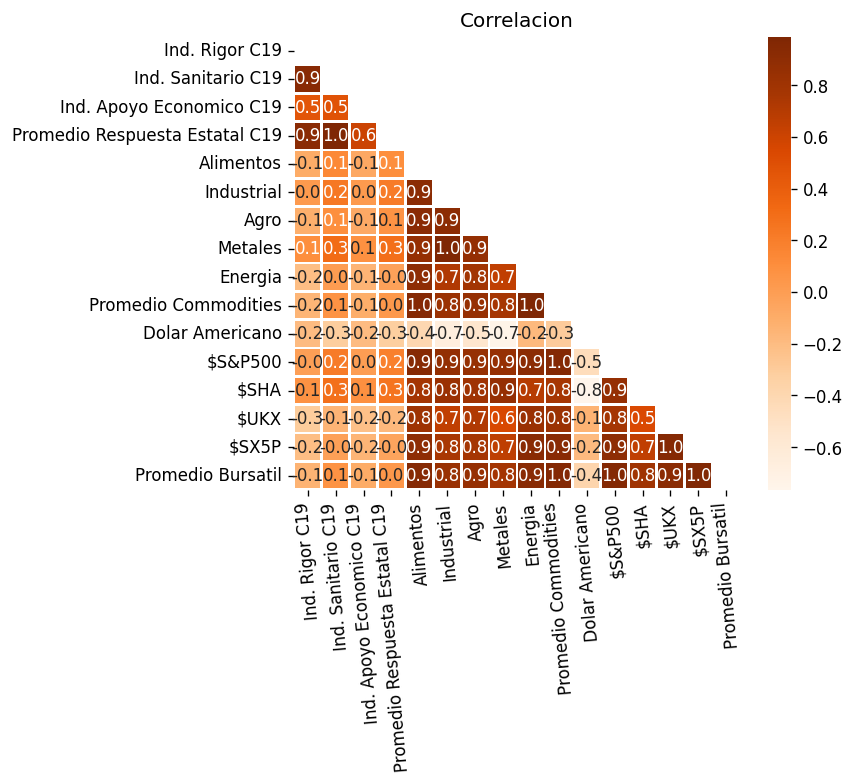

In [106]:
#Correlaciones
plt.figure(dpi = 120,figsize= (6,5))
mask = np.triu(np.ones_like(df_Integrado.corr(),dtype = bool))
sns.heatmap(df_Integrado.corr(),mask = mask, fmt = ".1f",annot=True,lw=1,cmap = 'Oranges')
plt.yticks(rotation = 0)
plt.xticks(rotation = 95)
plt.title('Correlacion')
plt.show()

<Figure size 300x200 with 0 Axes>

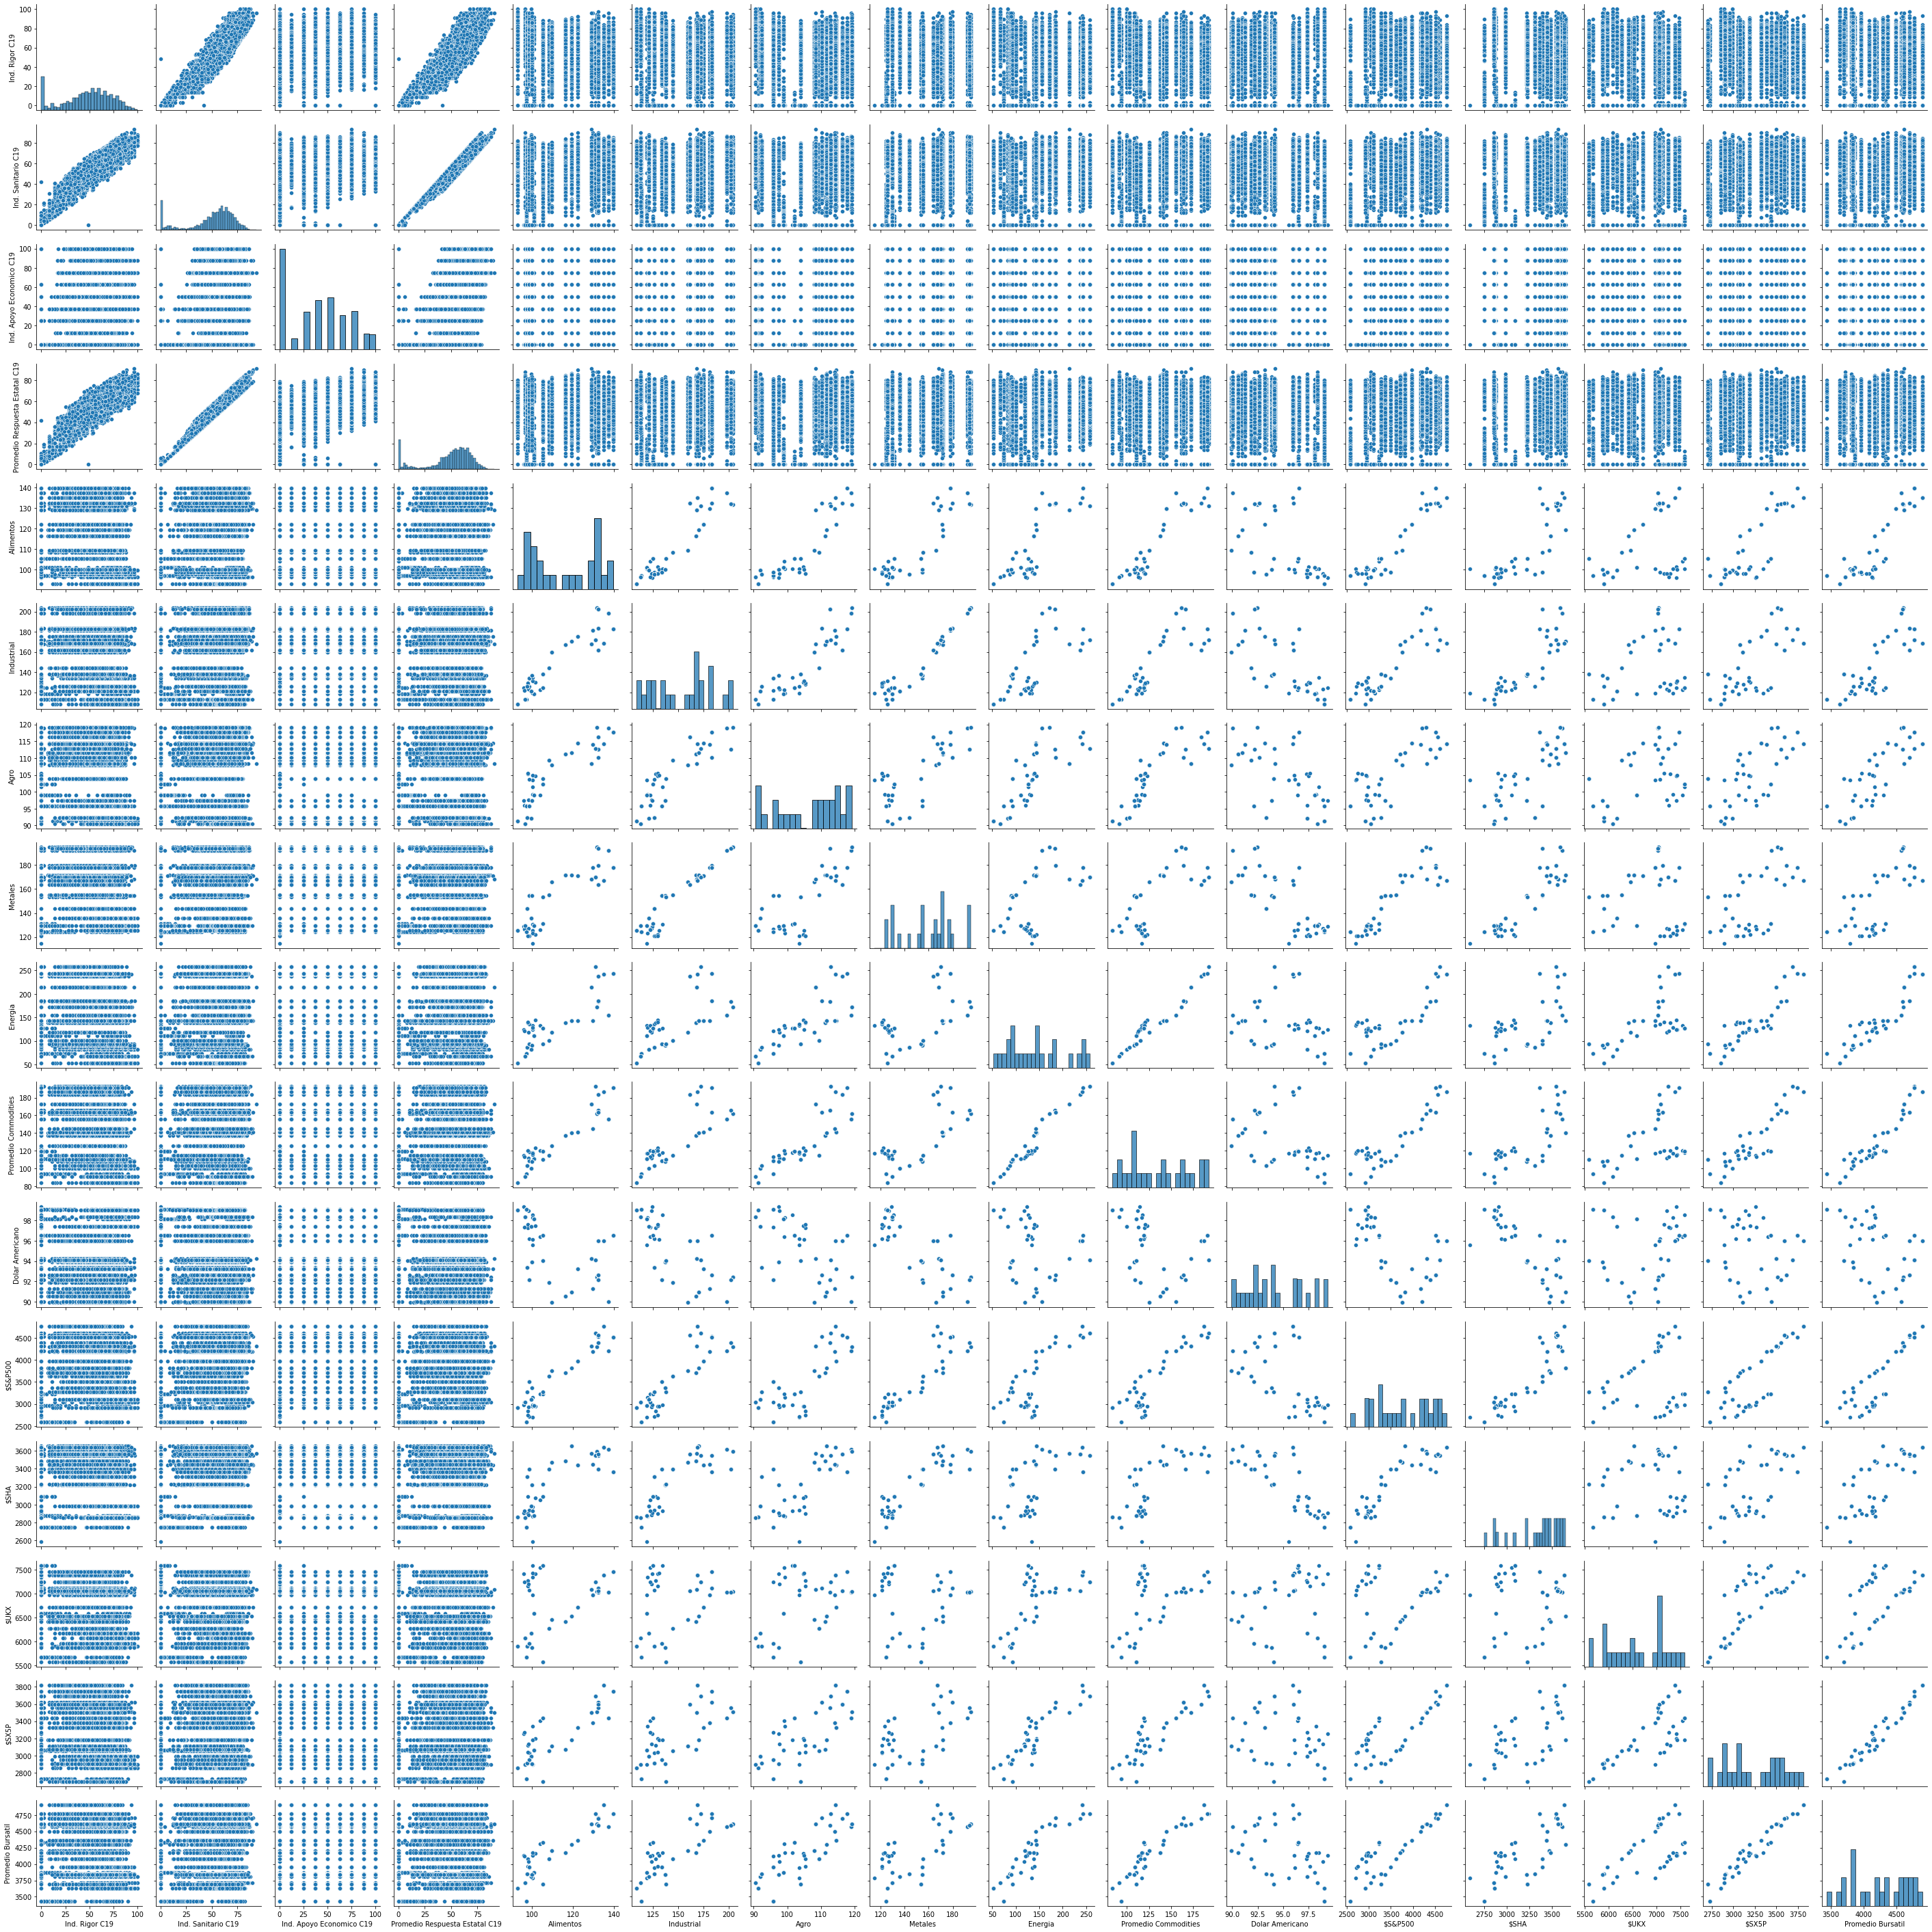

In [76]:
# Estudiamos el Pairplot para observar con intuicion relaciones significativas

plt.figure(dpi=50)
sns.pairplot(df_Integrado)
plt.show()

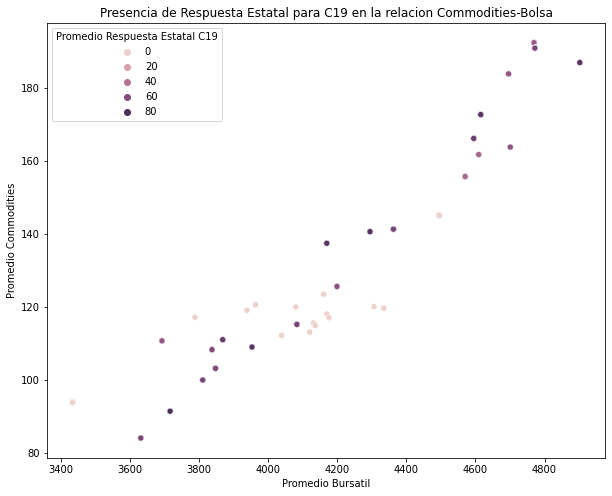

In [107]:
# Relacion entre los 3 Superindices.

plt.figure(figsize=(10,8))
sns.scatterplot(x='Promedio Bursatil',y='Promedio Commodities',data=df_Integrado,hue='Promedio Respuesta Estatal C19')
plt.title('Presencia de Respuesta Estatal para C19 en la relacion Commodities-Bolsa')
plt.show()

Text(0.5, 1.0, 'Relacion entre Sector Alimentos y el Promedio Bursatil')

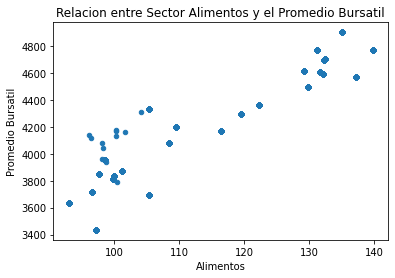

In [112]:
# Alimentos x Promedio Bursatil

df_Integrado.plot.scatter(x= 'Alimentos', y='Promedio Bursatil')
plt.title('Relacion entre Sector Alimentos y el Promedio Bursatil')

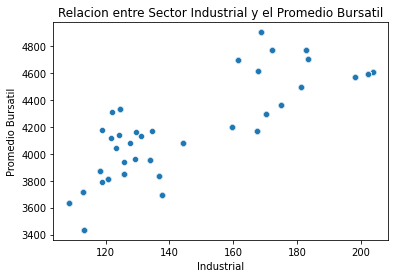

In [114]:
# Industria x Promedio Bursatil

sns.scatterplot(x="Industrial", y="Promedio Bursatil", data=df_Integrado)

plt.title('Relacion entre Sector Industrial y el Promedio Bursatil')
plt.show()

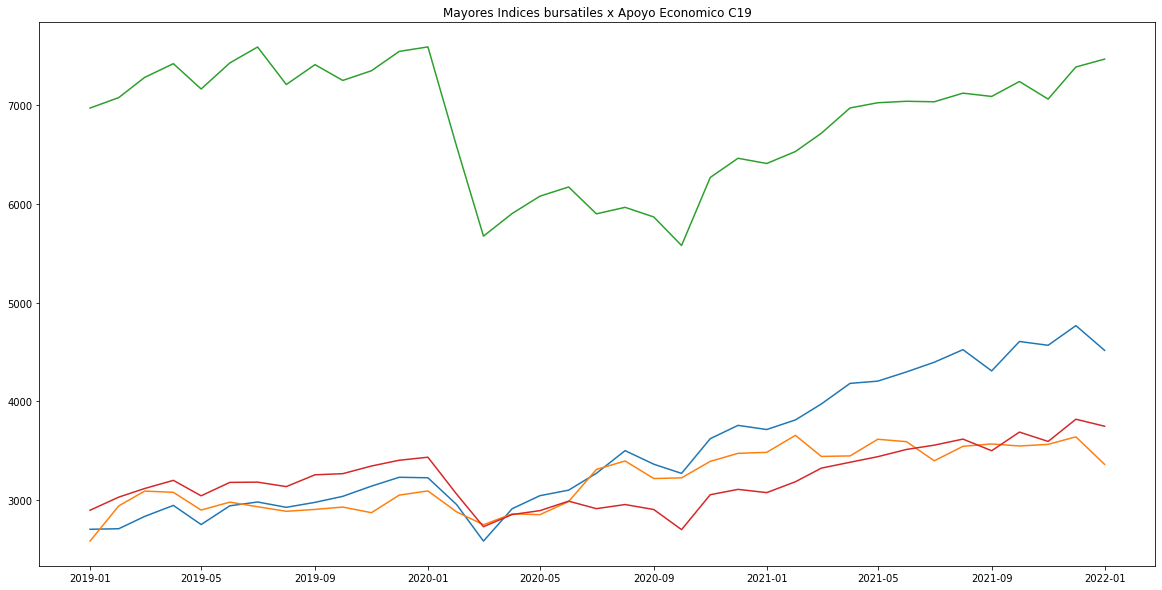

In [136]:
#Indices Bursatiles x Apoyo Economico C19. 

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(df_Integrado.Fecha, df_Integrado['$S&P500'], label='$S&P500')
ax.plot(df_Integrado.Fecha, df_Integrado['$SHA'], label='$SHA')
ax.plot(df_Integrado.Fecha, df_Integrado['$UKX'], label='$UKX')
ax.plot(df_Integrado.Fecha, df_Integrado['$SX5P'], label='$SX5P')


plt.title('Mayores Indices bursatiles x Apoyo Economico C19')
plt.show()
ax.legend()

# Aca es necesario escalar la ultima variable para que sea notoria en el grafico
# Es notoria la caida para el indice verde durante el principio 2020. 

In [34]:
df_Integrado.groupby('Agro')['Industrial'].sum().sort_values(ascending=False)

Agro
119.09    63570.00
112.61    63095.76
118.89    61829.04
110.18    57180.24
117.71    57049.20
114.13    56546.88
114.47    54587.52
112.83    53713.92
111.70    53118.00
114.32    52609.44
108.46    52372.32
111.17    52219.44
116.29    50397.36
108.05    49760.88
109.40    45046.56
103.98    42981.12
97.43     42634.80
95.73     41739.36
92.36     39268.32
102.19    38840.88
92.05     37664.64
98.97     36912.72
95.85     35321.52
90.56     35193.60
91.33     33823.92
101.49      134.43
104.96      130.99
104.68      129.66
105.44      129.33
105.41      127.54
103.61      125.81
97.36       124.10
97.62       123.20
99.12       122.09
95.92       121.74
99.19       119.01
103.54      118.84
0.00          0.00
Name: Industrial, dtype: float64

In [35]:
df_Integrado.groupby('Pais').sum().sort_values(by='Ind. Rigor C19', ascending=False)

# Si bien por demas interesante la agrupacion y comparacion entre paises, algo me dice que los datos son dispares/incompletos/asimetricos...ya que: 
#   1) los paises que "lideran la tabla", no son ni a palos los que mas riguroso fueron. 
#    2) Los primeros 5 paises tienen un numero alto, y a partir de Honduras "se plancha".

# Se podria investigar cual es el motivo de esto, pero igual nuestro foco no tiene por que estar en la comparacion entre paises. 
#    Digamos que lo que nos interesa es "el promedio de todos los paises", y no "cada uno de ellos". Nuestros indices bursatiles y de commodities son GLOBALES, 
#       de ahi que me acabas de dar la idea de hacer tambien un "Pais" "Global" que promedie a los 168 del dataset. 

,Ind. Rigor C19,Ind. Sanitario C19,Ind. Apoyo Economico C19,Promedio Respuesta Estatal C19,Alimentos,Industrial,Agro,Metales,Energia,Promedio Commodities,Dolar Americano,$S&P500,$SHA,$UKX,$SX5P,Promedio Bursatil
Pais,,,,,,,,,,,,,,,,
United States,61846.74,69998.35,58625.0,68572.31,150881.64,201246.24,138307.00,208231.40,184720.64,177279.44,132579.72,5358202.20,4683155.36,9344260.64,4584623.68,5992561.12
China,44743.05,50760.42,23550.0,47358.96,92850.24,123843.84,85112.00,128142.40,113674.24,109095.04,81587.52,3297355.20,2881941.76,5750314.24,2821306.88,3687729.92
Brazil,30438.96,29607.85,24725.0,28359.93,81243.96,108363.36,74473.00,112124.60,99464.96,95458.16,71389.08,2885185.80,2521699.04,5031524.96,2468643.52,3226763.68
Canada,21054.17,21325.64,14987.5,20528.82,40621.98,54181.68,37236.50,56062.30,49732.48,47729.08,35694.54,1442592.90,1260849.52,2515762.48,1234321.76,1613381.84
United Kingdom,7197.69,7391.22,9750.0,7685.97,14507.85,19350.60,13298.75,20022.25,17761.60,17046.10,12748.05,515211.75,450303.40,898486.60,440829.20,576207.80
Honduras,1856.48,1638.46,1637.5,1638.34,2901.57,3870.12,2659.75,4004.45,3552.32,3409.22,2549.61,103042.35,90060.68,179697.32,88165.84,115241.56
Venezuela,1834.25,1583.06,1250.0,1541.44,2901.57,3870.12,2659.75,4004.45,3552.32,3409.22,2549.61,103042.35,90060.68,179697.32,88165.84,115241.56
Peru,1817.61,1745.23,1425.0,1705.20,2901.57,3870.12,2659.75,4004.45,3552.32,3409.22,2549.61,103042.35,90060.68,179697.32,88165.84,115241.56
Italy,1815.27,1878.26,1725.0,1859.12,2901.57,3870.12,2659.75,4004.45,3552.32,3409.22,2549.61,103042.35,90060.68,179697.32,88165.84,115241.56


In [36]:
# Proximos analisis : Indices vs. Datetime. 